In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Decision Tree Classification

In [118]:
from sklearn.datasets import load_iris

iris = load_iris()


In [119]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [120]:
X = pd.DataFrame(iris["data"])
y = iris["target"]

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,shuffle=True,test_size=0.20)

In [122]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 

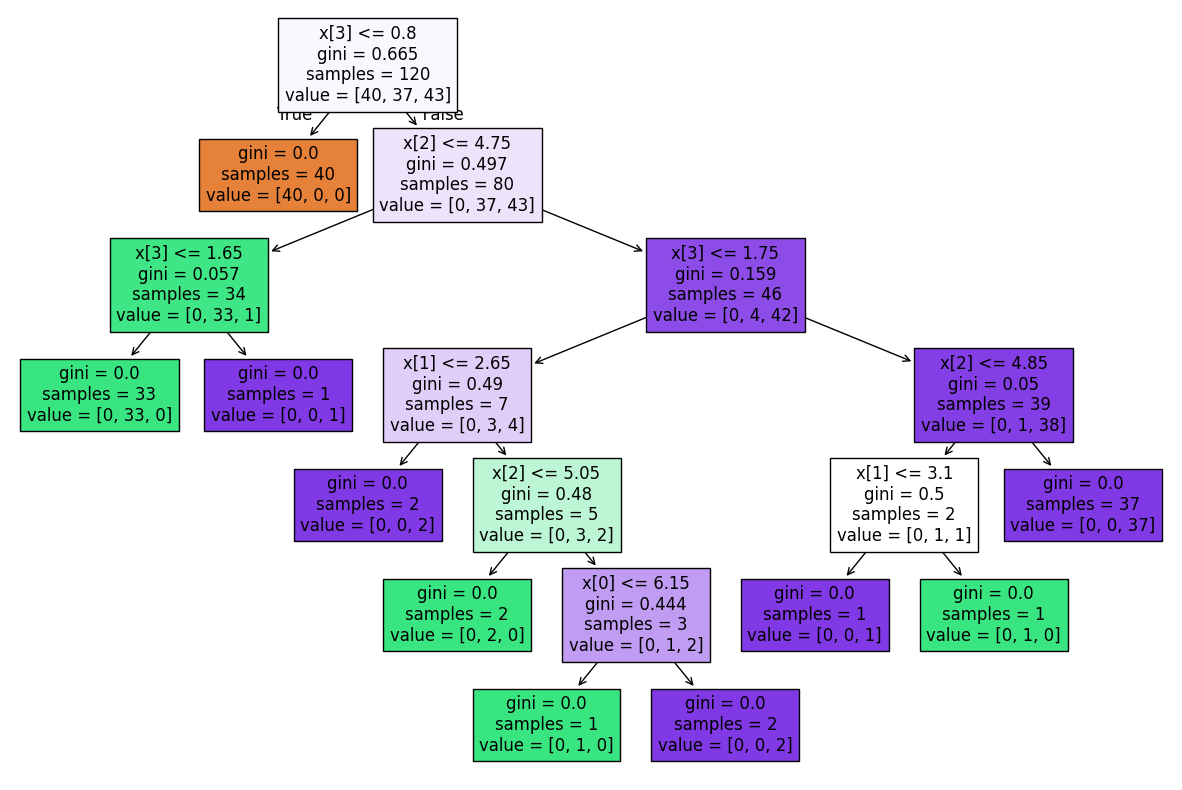

In [123]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(DTC,filled=True)

### POST  Pruning

    Post-pruning a Decision Tree in sklearn is done using the ccp_alpha (cost complexity pruning) parameter. Here’s how you can perform post-pruning:

    Steps:
    Get ccp_alphas: Train the tree without pruning and extract the cost complexity pruning path.
    Train Trees for Different ccp_alpha Values: Fit multiple Decision Trees with different ccp_alpha values.
    Select the Best ccp_alpha: Use cross-validation or validation accuracy to determine the optimal value.

In [124]:
from sklearn.metrics import accuracy_score




path  = DTC.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas[:-1]

print(ccp_alphas)
best_alpha = None
best_score = 0
models = []


for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    models.append((ccp_alpha, dtc, score))
    
    if score > best_score:
        best_score = score
        best_alpha = ccp_alpha

pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

# Evaluate final model
y_pred = pruned_tree.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Best ccp_alpha: {best_alpha}")
print(f"Final Validation Accuracy: {final_accuracy}")

[0.         0.00811966 0.00952381 0.01605882 0.01617647 0.2544123 ]
Best ccp_alpha: 0.0
Final Validation Accuracy: 0.9666666666666667


### PRE Pruning
    In pre pruning we limit the decision tree using some params and we can find the best value of the params using cv 

In [125]:
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [126]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes["data"])
y = diabetes["target"]

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,shuffle=True,test_size=0.20)

In [128]:
pipe = Pipeline([
    ("dtc",DecisionTreeRegressor())
])
 
param_grid={
    "dtc__criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "dtc__splitter":['best', 'random'],
    "dtc__max_depth":np.linspace(1, 40, 20).astype(int),
    "dtc__min_samples_split":[1,2,3,4,5,6]
}
model = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring="r2",n_jobs=-1)



In [129]:
import warnings
warnings.filterwarnings("ignore")


model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('dtc', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dtc__criterion': ['squared_error', 'friedman_mse',
                                            'absolute_error', 'poisson'],
                         'dtc__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 40]),
                         'dtc__min_samples_split': [1, 2, 3, 4, 5, 6],
                         'dtc__splitter': ['best', 'random']},
             scoring='r2')

In [130]:
print(model.best_params_)

{'dtc__criterion': 'poisson', 'dtc__max_depth': 3, 'dtc__min_samples_split': 2, 'dtc__splitter': 'random'}


In [131]:
print(model.best_score_)

0.37579681703536155
